# Pizza plots for College Stats

## Imports 

In [1]:
import pandas as pd 
import numpy as np 

from scipy import stats
import math 

from mplsoccer import PyPizza, add_image, FontManager
import matplotlib.pyplot as plt 

from PIL import Image

## Retrieve college stats for 2011 first Round Draft picks

In [2]:
college = pd.read_csv("../data/college_stats.csv")

In [3]:
college.shape

(24, 27)

In [4]:
college.head()

,Player,Season,Age,College,G,MP,FG,FGA,3P,3PA,...,TOV,PF,PTS,FG%,3P%,FT%,MP/G,PTS/G,RB/G,AST/G
0,Jimmy Butler,2010-11,21,MARQUETTE,37,1282,187,382,20,58,...,54,49,582,0.490,0.345,0.783,34.6,15.7,6.1,2.3
1,Kyrie Irving,2010-11,18,DUKE,11,303,55,104,18,39,...,27,23,192,0.529,0.462,0.901,27.5,17.5,3.4,4.3
2,Derrick Williams,2010-11,19,ARIZONA,38,1141,226,380,42,74,...,100,106,741,0.595,0.568,0.746,30.0,19.5,8.3,1.1
3,Tristan Thompson,2010-11,19,TEXAS,36,1104,172,315,0,0,...,64,100,471,0.546,NaN,0.487,30.7,13.1,7.8,1.3
4,Brandon Knight,2010-11,19,KENTUCKY,38,1363,217,513,87,231,...,120,83,657,0.423,0.377,0.795,35.9,17.3,4.0,4.2


In [5]:
butler_cropped = Image.open("../assets/butler_cropped_image.png")

## Clean college data

In [6]:
college.head()

,Player,Season,Age,College,G,MP,FG,FGA,3P,3PA,...,TOV,PF,PTS,FG%,3P%,FT%,MP/G,PTS/G,RB/G,AST/G
0,Jimmy Butler,2010-11,21,MARQUETTE,37,1282,187,382,20,58,...,54,49,582,0.490,0.345,0.783,34.6,15.7,6.1,2.3
1,Kyrie Irving,2010-11,18,DUKE,11,303,55,104,18,39,...,27,23,192,0.529,0.462,0.901,27.5,17.5,3.4,4.3
2,Derrick Williams,2010-11,19,ARIZONA,38,1141,226,380,42,74,...,100,106,741,0.595,0.568,0.746,30.0,19.5,8.3,1.1
3,Tristan Thompson,2010-11,19,TEXAS,36,1104,172,315,0,0,...,64,100,471,0.546,NaN,0.487,30.7,13.1,7.8,1.3
4,Brandon Knight,2010-11,19,KENTUCKY,38,1363,217,513,87,231,...,120,83,657,0.423,0.377,0.795,35.9,17.3,4.0,4.2


## Load some fonts

In [7]:
font_normal = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                           "Roboto-Regular.ttf?raw=true"))
font_italic = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                           "Roboto-Italic.ttf?raw=true"))
font_bold = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                         "Roboto-Medium.ttf?raw=true"))

## Select some columns

In [8]:
college.columns

Index(['Player', 'Season', 'Age', 'College', 'G', 'MP', 'FG', 'FGA', '3P',
       '3PA', 'FT', 'FTA', 'ORB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS', 'FG%', '3P%', 'FT%', 'MP/G', 'PTS/G', 'RB/G', 'AST/G'],
      dtype='object')

In [9]:
college['STL/G'] = college['STL']/college['G']
college['BLK/G'] = college['BLK']/college['G']

In [10]:
params = ['MP/G', 'PTS/G', 'AST/G', 'RB/G', 'STL/G', 'BLK/G', 'FG%', '3P%', 'FT%']

## Select Butler data

In [11]:
player = college.loc[college['Player']=='Jimmy Butler'].reset_index()

In [12]:
player

,index,Player,Season,Age,College,G,MP,FG,FGA,3P,...,PTS,FG%,3P%,FT%,MP/G,PTS/G,RB/G,AST/G,STL/G,BLK/G
0,0,Jimmy Butler,2010-11,21,MARQUETTE,37,1282,187,382,20,...,582,0.49,0.345,0.783,34.6,15.7,6.1,2.3,1.432432,0.351351


In [13]:
player = player[params]

In [14]:
player

,MP/G,PTS/G,AST/G,RB/G,STL/G,BLK/G,FG%,3P%,FT%
0,34.6,15.7,2.3,6.1,1.432432,0.351351,0.49,0.345,0.783


In [15]:
player = list(player.loc[0])
print(player)

[34.6, 15.7, 2.3, 6.1, 1.4324324324324325, 0.35135135135135137, 0.49, 0.345, 0.783]


In [16]:
print(len(params), len(player))

9 9


## Calculate the percentiles

In [17]:
values = []
for x in range(len(params)):   
    values.append(math.floor(stats.percentileofscore(college[params[x]],player[x])))

In [18]:
round(stats.percentileofscore(college[params[0]],player[0]))

62

In [19]:
for n,i in enumerate(values):
    if i == 100:
        values[n] = 99

## Build the pizza

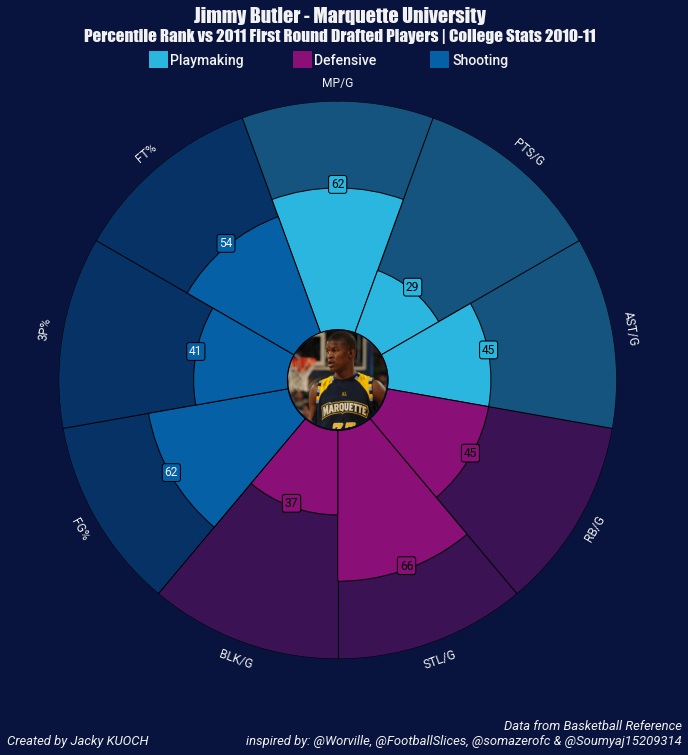

In [20]:
# color for the slices and text
slice_colors = ["#2bb6e0"] * 3 + ["#8A0F77"] * 3 + ["#0660A6"] * 3
text_colors = ["#000000"] * 6 + ["#F2F2F2"] * 3

# instantiate PyPizza class
baker = PyPizza(
    params=params,                  # list of parameters
    background_color="#08143D",     # background color
    straight_line_color="#000000",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_color="#000000",    # color for last line
    last_circle_lw=1,               # linewidth of last circle
    other_circle_lw=0,              # linewidth for other circles
    inner_circle_size=22           # size of inner circle
)

# plot pizza
fig, ax = baker.make_pizza(
    values,                          # list of values
    figsize=(10, 10.5),                # adjust the figsize according to your need
    color_blank_space="same",        # use the same color to fill blank space
    slice_colors=slice_colors,       # color for individual slices
    value_colors=text_colors,        # color for the value-text
    value_bck_colors=slice_colors,   # color for the blank spaces
    blank_alpha=0.4,                 # alpha for blank-space colors
    kwargs_slices=dict(
        edgecolor="#000000", zorder=2, linewidth=1
    ),                               # values to be used when plotting slices
    kwargs_params=dict(
        color="#F2F2F2", fontsize=12,
        fontproperties=font_normal.prop, va="center"
    ),                               # values to be used when adding parameter labels
    kwargs_values=dict(
        color="#F2F2F2", fontsize=12,
        fontproperties=font_normal.prop, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )                                # values to be used when adding parameter-values labels
)

# add title
fig.text(0.515, 0.975, "Jimmy Butler - Marquette University", size=20,ha="center", fontname = 'Impact', color="#F2F2F2")

# add subtitle
fig.text(0.515, 0.95,"Percentile Rank vs 2011 First Round Drafted Players | College Stats 2010-11", size=17, ha="center", fontname = 'Impact', color="#F2F2F2", fontweight="light")

# add credits
CREDIT_1 = "Data from Basketball Reference"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
    0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=13,
    fontproperties=font_italic.prop, color="#F2F2F2",
    ha="right")
    
fig.text(0.25, 0.02, "Created by Jacky KUOCH", size=13, fontproperties=font_italic.prop, color="#F2F2F2",ha="right")

# add text
fig.text(0.28, 0.92, "Playmaking", size=14, fontproperties=font_bold.prop, color="#F2F2F2")
fig.text(0.48, 0.92, "Defensive", size=14, fontproperties=font_bold.prop, color="#F2F2F2")
fig.text(0.672, 0.92, "Shooting", size=14, fontproperties=font_bold.prop, color="#F2F2F2")

# add rectangles
fig.patches.extend([
    plt.Rectangle(
        (0.25, 0.917), 0.025, 0.021, fill=True, color="#2bb6e0",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.45, 0.917), 0.025, 0.021, fill=True, color="#8A0F77",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.64, 0.917), 0.025, 0.021, fill=True, color="#0660A6",
        transform=fig.transFigure, figure=fig
    ),
])

# add image
ax_image = add_image(butler_cropped, fig, left=0.439, bottom=0.438, width=0.145, height=0.130)


plt.show()